# Функции

##1.1

Постройте график функции и её производной первого порядка. Также найдите точки экстремума функции, отметьте их на графике другим цветом. Вычисления проведите вручную и приложите скрин расчетов.

$f(x) = (x^2-2x)ln(x)-1.5x^2+4x$


![](img.png)

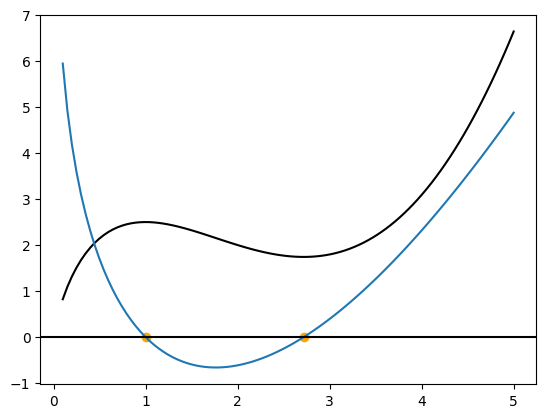

In [20]:
import numpy as np
from scipy.special import factorial
import matplotlib.pyplot as plt
import math


def f(x):
  return (x**2 - 2*x)*np.log(x) - 1.5*x**2 + 4*x

def f_dx(x):
    return (2*x-2)*np.log(x) + (x**2-2*x)/x -3*x +4
    # return (2*x - 2)*(np.log(x) - 1)
    


x_values = np.linspace(0.1, 5, 100)
# fig, ax = plt.subplots(1, 1,figsize=(9, 5), sharex='all')
extremum_x = np.array([1, np.e])
extremum_y = f(extremum_x)
plt.plot(x_values, f(x_values), color='black')
# plt.scatter(extremum_x, extremum_y, color='orange')
plt.plot(x_values, f_dx(x_values))
plt.scatter(extremum_x, [0, 0], color='orange')
plt.axhline(c='black')

##1.2

Найдите частные производные функции $f(x, y, z) = 15x^2 + exp(x^2 + y^3)*cos(z)$ с помощью [SymPy](https://www.geeksforgeeks.org/python-sympy-diff-method/)

In [2]:
import sympy as sp
x, y, z = sp.symbols('x y z')
f = 15*x**2 + sp.exp(x**2+y**3) * sp.cos(z)
f_dx = sp.diff(f, x)
f_dy = sp.diff(f, y)
f_dz = sp.diff(f, z)
print(f)
print(f_dx)
print(f_dy)
print(f_dz)

15*x**2 + exp(x**2 + y**3)*cos(z)
2*x*exp(x**2 + y**3)*cos(z) + 30*x
3*y**2*exp(x**2 + y**3)*cos(z)
-exp(x**2 + y**3)*sin(z)


## 2

Не всегда значения функций возможно рассчитать напрямую, однако их можно вычислить приближенно, используя, например, ряды Тейлора. Реализуйте расчет $e^x$. Сравните значения, получаемые с различной точностью приближения (5, 10, 15), с numpy-реализацией. Постройте график, отобразив на нём все четыре линии.

In [3]:
x_values = np.linspace(-10, 10, 100)

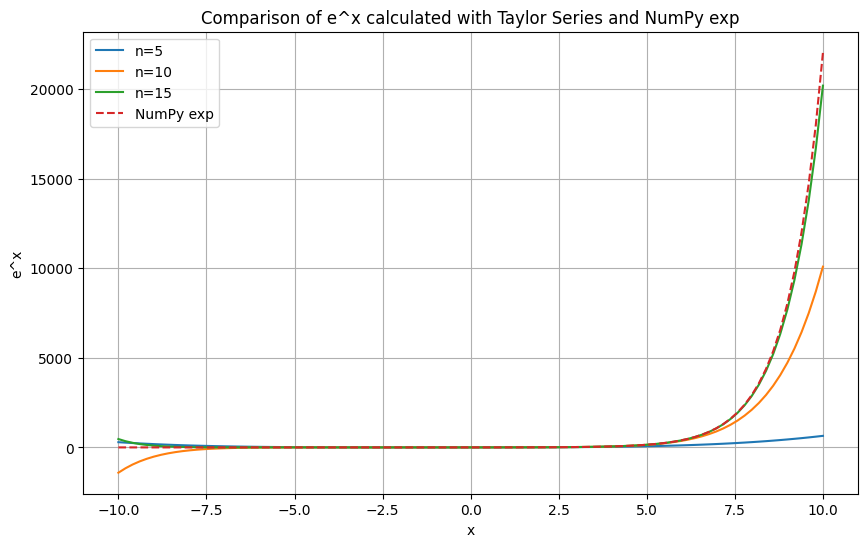

In [4]:
# Function to calculate e^x using Taylor series
def e_x_taylor(x_values, n):
    res = np.ones(len(x_values))
    for i in range(1, n):
        res += x_values ** i / factorial(i)
    return res

e_x_taylor_5 = e_x_taylor(x_values, 5)
e_x_taylor_10 = e_x_taylor(x_values, 10)
e_x_taylor_15 = e_x_taylor(x_values, 15)


e_x_numpy = np.exp(x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, e_x_taylor_5, label='n=5')
plt.plot(x_values, e_x_taylor_10, label='n=10')
plt.plot(x_values, e_x_taylor_15, label='n=15')
plt.plot(x_values, e_x_numpy, label='NumPy exp', linestyle='--')
plt.xlabel('x')
plt.ylabel('e^x')
plt.title('Comparison of e^x calculated with Taylor Series and NumPy exp')
plt.legend()
plt.grid(True)
plt.show()

## 3

Рассмотрите две следующие функции, часто использующиеся как функции потерь (то есть они помогают оценить качество предсказаний модели).

$MAE (Mean\ Absolute\ Error) = \frac{1}{n} \sum_{i=1}^{n} |y_i - \widehat{y}_i|$

$MSE (Mean\ Squared\ Error) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \widehat{y}_i)^2$

Письменно ответьте на вопросы:

1. Какая проблема присуща MAE с точки зрения дифференцирования?

2. Если в качестве $\widehat{y}_i$ всегда будет предсказываться константное значение, каким оно должно быть, чтобы минимизировать значение каждой из функций?


Ответ: 
1. Проблема mae в том, что функция имеет разрыв 1-го порядка в точке $y_i = \widehat{y}_i$
2. Для MAE - это медиана. Для MSE - это среднее. Почему?

Пояснение:
**MSE**
Пусть y - это распределение.
Мы можем записать MSE как $E(E((y-y_hat)^2))$
Пусть MSE минимально при $\widehat{y} = E(y)$, чтобы доказать это докажем, что $MSE(E(y)) <= MSE(E(y)+a)$ для любого a.
Действительно $E((y-E(y)+a)^2) = E((y-Ey)^2) + 2*a*(x-Ex) + a^2 $
$2*a*(x-Ex) + a^2 > 0$ при любом a =>$ MSE(E(y)) <= MSE(E(y)+a) $=>  MSE минимально при $\widehat{y} = E(y)$

**MAE**
Пусть у нас нечетное количество точек. Тогда у нас есть одна точка посередине. Остальные точки соединим в пары. ближайщая точка слева, ближайшая точка справа. 
Покажу на примере, пусть у нас есть точки \[1, 2, 3 ,4, 5]
Тогда посередине будет 3. Пары будут \[2, 4], \[1, 5]

Если мы отступ от средней точки на a, то к MAE добавится > a. Получается, что MED(y) - это лучшее место для константы  

# Матрицы. Векторы

##1

Реализуйте следующие паттерны. Не используйте циклы! Все матрицы квадратные со стороной длины n. Примеры приведены для n=5.

1. Шахматная доска
```
[[0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0.]]
 ```
2. Полоса шириной 3 относительно главной диагонали
```
[[1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1.]]
 ```
3. Кайма из единиц
```
[[1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1.]]
 ```
4. Полосы
```
[[0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]]
 ```
5. Верхний треугольник
```
[[1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 1.]]
 ```


In [11]:
def chess(n):
    a = np.ones([n, n])
    a[::2, ::2] = 0
    a[1::2, 1::2] = 0
    return a
chess(5)

array([[0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0.]])

In [13]:
np.eye(5, 5, k=1)

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.]])

In [14]:
def three_diag(n):
    return np.eye(5, 5, k=-1) + np.eye(n, n) + np.eye(n, n, k=1)
    
three_diag(5)

array([[1., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0.],
       [0., 1., 1., 1., 0.],
       [0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1.]])

In [16]:
def border_of_ones(n):
    res= np.ones([n, n])
    res[1:-1, 1:-1] = 0
    return res
border_of_ones(5)

array([[1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 1., 1., 1., 1.]])

In [18]:
def lines(n):
    res = np.zeros((n, n))
    res[1::2] = 1
    return res
lines(5)       

array([[0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0.]])

In [19]:
n = 5
np.triu(np.ones([n]))

array([[1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1.]])

##2

Пусть дан вектор следующего вида. Преобразуйте его, чтобы получить две матрицы: первая должна содержать одинаковые значения column-wise (столбец целиком из нулей, столбец целиком из единиц и так далее), а вторая - row-wise. Не используйте циклы.

In [10]:
n = 5
vector = np.hstack([[i for i in range(n)] for _ in range(n)])  # также существуют vstack и dstack
print(vector)

[0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4]


In [11]:
vector.reshape(n, n)

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [12]:
vector.reshape(n, n).T

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4]])

# Теория вероятностей

## 1

Постройте графики плотности распределений для следующих распределений:

* Биномиальное распределение
* Геометрическое распределение
* Равномерное распределение
* Нормальное распределение
* Логнормальное распределение

Параметры распределений выберите произвольно. Подумайте, какие явления в реальном мире подчиняются тому или иному распределению.

Отобразите также следующие статистические показатели: выборочное среднее, мода, медиана, стандартное отклонение.

In [83]:
import scipy.stats as sts
def plot_discrete(x, distribution, *args):
    y = distribution.pmf(x, *args)
    plt.stem(x, y)
def plot_continuous(x, distribution, *args):
    y = distribution.pdf(x, *args)
    plt.plot(x, y)


def plot_metrics(distribution, mode, *args):
    mean = distribution.mean(*args)
    median = distribution.median(*args)
    std = distribution.std(*args)
    plt.plot([], [], label=f'mean={mean}', c='white')
    plt.plot([], [], label=f'median={median}', c='white')
    plt.plot([], [], label=f'mode={mode}', c='white')
    plt.plot([], [], label=f'std={std}', c='white')
    plt.legend()
  

Биномиальное

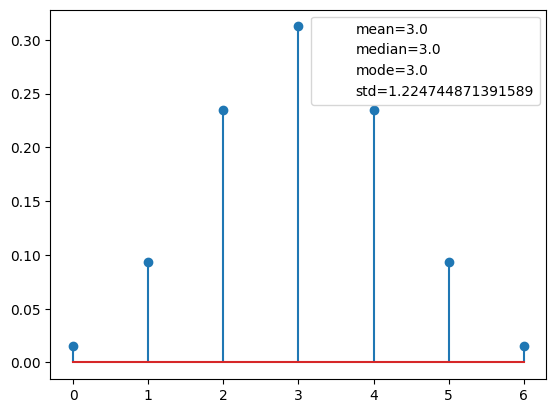

In [84]:
n = 6
p = 0.5
plot_discrete(np.arange(n+1), sts.binom, n, p)
mode = np.floor((n+1)*p)
plot_metrics(sts.binom, mode, n, p)

Геометрическое 

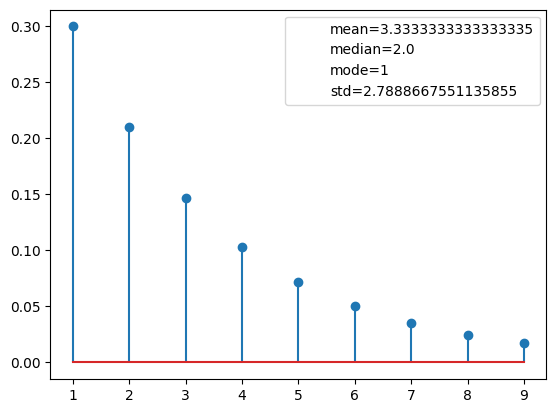

In [85]:
p = 0.3
x = np.arange(1, 10)
plot_discrete(x, sts.geom, p)
mode = 1
plot_metrics(sts.geom, mode, p)

Равномерное

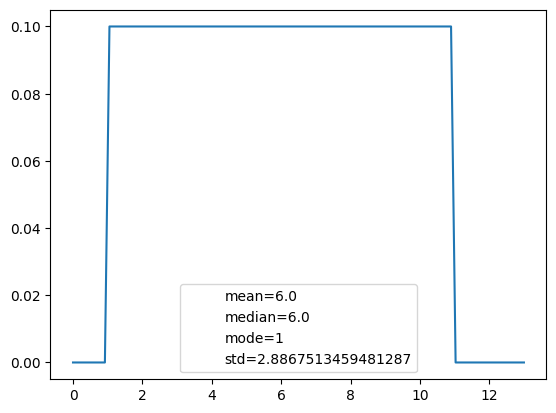

In [86]:
loc = 1
scale = 10
x = np.linspace(0, 13, 100)
plot_continuous(x, sts.uniform, loc, scale)
mode = loc
plot_metrics(sts.uniform, mode, loc, scale)

Нормальное

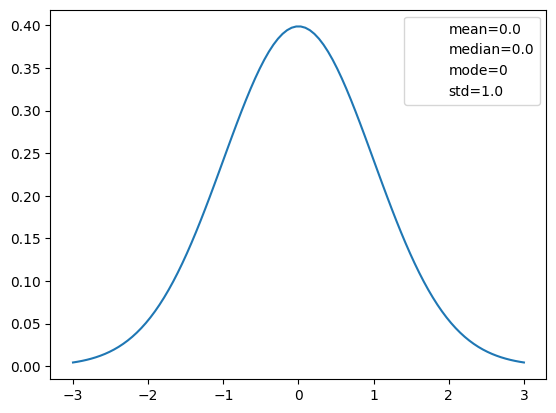

In [87]:
loc = 0
scale = 1
x = np.linspace(-3, 3, 100)
plot_continuous(x, sts.norm, loc, scale)
mode = loc
plot_metrics(sts.norm, mode, loc, scale)

Логнормальное

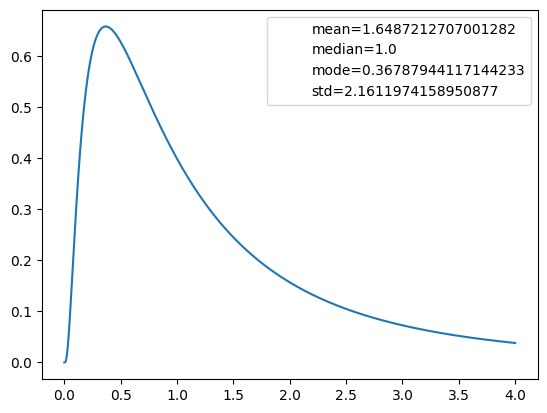

In [88]:
# параметры нормального распределения
mu = 0
sigma = 1
# параметры lognorm на основе нормального распределения
s = sigma
scale = np.exp(mu)
x = np.linspace(0, 4, 10000)
plot_continuous(x, sts.lognorm, s,0, scale)
mode = np.exp(mu-sigma**2)
plot_metrics(sts.lognorm, mode, s, 0, scale)

проверим, что подсчет параметров lognorm выполнен верно. Для этого сравним значения cdf

In [89]:
# параметры нормального распределения
mu = 4
sigma = 1
# параметры lognorm на основе нормального распределения
s = sigma
scale = np.exp(mu)
val = 3 # значение, на котором проверяем
norm = sts.norm.cdf(val, mu, sigma)
log = sts.lognorm.cdf(np.exp(val), s,0, scale)
print(f'norm: {norm}')
print(f'log: {log}')

norm: 0.15865525393145707
log: 0.15865525393145707


Подумайте, в каких случаях медиана предпочтительнее среднего при расчете "средней температуры по больнице". Какие модификации можно было бы произвести для формулы среднего или для выборки, чтобы среднее значение стало более репрезентативно в подобных случаях? Напишите ответ.

Медиану следует применять, когда в наших данных много выбросов, потому что она более устойчива к ним. Например, когда мы рассматриваем зарплату по стране медиана более репрезентативна, потому что у нас есть 5% сверхбогатого населения.
Также медиана лучше работает с данными, у которых нет сильного скоса. Например, в данных о зарплате по стране у нас будет положительный скос, то есть будет длинные положительный хвост, который будет смещать среднее в сторону большего. 

Для улучшения робастности среднего можно использовать следующие техники:
* Отсчение выбросов. Например, считать среднне только в пределах 3-х стандартных отклонений
* Трансформация исходных данных. Например, можно нормализовать данные, чтобы побороться со скосом

## 2 (2 балла)

1000 человек бросают монетку. Каждый бросил 10 раз подряд.

 1. Какова вероятность того, что хотя бы у одного человека монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?
 2. Какова вероятность того, что хотя бы у одного человека монетка выпала 8 раз подряд той же самой стороной (орлом или решкой)?
 3. Какова вероятность того, что ровно у троих человек из 1000 монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?

 Рассчитайте вероятности, а также смоделируйте ситуацию и оцените эмпирическое распределение.

Вопрос 1

In [19]:
p_10 = 2 * sts.binom.pmf(10, 10, 0.5)
print(f'вероятность: {1 - sts.binom.pmf(0, 1000, p_10)}')

вероятность: 0.858440454732242


Вопрос 2

In [91]:
p_8 = 2 * 5 * (0.5 ** 10) 
print(f'вероятность: {1 - sts.binom.pmf(0, 1000, p_8)}')

вероятность: 0.9999452986105908


Вопрос 3

In [21]:
p_10 = 2 * (0.5 ** 10)
print(f'вероятность: {sts.binom.pmf(3, 1000, p_10)}')

вероятность: 0.1762873858121735


Моделирование ситуации

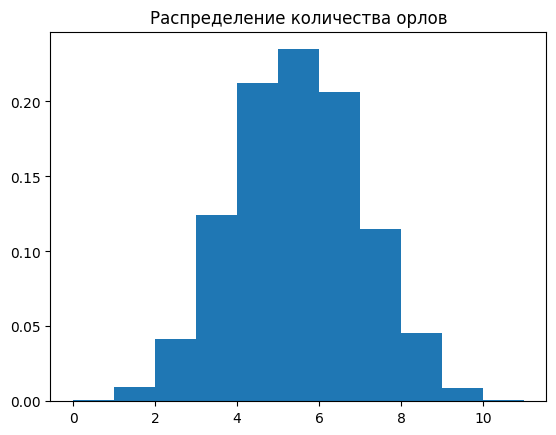

In [110]:
results_matr = np.random.uniform(size=[10000, 10]) > 0.5
n_orlov = np.sum(results_matr, axis=1)
plt.hist(n_orlov, np.arange(0, 10+2, 1), density=True);
plt.title('Распределение количества орлов');

## 3 (2 балла)

В магазин поступила новая продукция с трех предприятий. Процентный состав этой продукции следующий: 20% - продукция первого предприятия, 30% - продукция второго предприятия, 50% - продукция третьего предприятия; далее, 10% продукции первого предприятия высшего сорта, на втором предприятии - 5% и на третьем - 20% продукции высшего сорта. Найти вероятность того, что случайно купленная новая продукция окажется высшего сорта. Если известно, что купленная продукция высшего сорта, какова вероятность, что она была куплена на втором предприятии?

Решите задачу в общем случае для N предприятий, где доля продукции каждого составляет $a_i$, а доля продукции высшего сорта на каждом составляет $b_i$. Напишите функцию, принимающую на вход два списка: a и b, а также n - номер предприятия, для которого необходимо узнать вероятность, что продукция высшего сорта была куплена именно на нём (нумерация с единицы). Функция должна возвращать две вероятности.

In [8]:
def highest_category_probability(a, b):
    if not isinstance(a, np.ndarray):
         a = np.array(a)
    if not isinstance(b, np.ndarray):
        b = np.array(b)
    return np.sum(a * b)

highest_category_probability([0.2, 0.3, 0.5], [0.1, 0.05, 0.2])

0.135

In [9]:
def n_company_probability(a, b, n):
    p_high = highest_category_probability(a, b)
    p_n_high = a[n] * b[n]
    return p_n_high / p_high
n_company_probability([0.2, 0.3, 0.5], [0.1, 0.05, 0.2], 1)

0.1111111111111111

# Методы оптимизации (3 балла)



(Задание взято у Яндекса)

Дана функция $f(x) = (a\sin(x) + b\ln(x))^2 + cx^2$ и файл, содержащий пары (x, f(x)). Необходимо с точностью до трёх знаков после запятой подобрать коэффициенты a, b, c исходной функции. Для решения задачи предлагается использовать градиентный спуск и функцию потерь MSE.

P.S. на предоставленном наборе данных возможно получить MSE < 0.00001, ориентируйтесь на эту цифру.

In [24]:
!gdown 1P5REbDVMtoHk_EPOaXzFWym2sMKhhbg3

Downloading...
From: https://drive.google.com/uc?id=1P5REbDVMtoHk_EPOaXzFWym2sMKhhbg3
To: C:\my_stuff\itmo\math_methods_of_ml\lab1\data.txt

  0%|          | 0.00/27.0k [00:00<?, ?B/s]
100%|##########| 27.0k/27.0k [00:00<00:00, 341kB/s]


In [25]:
from autograd import grad, numpy as anp

In [26]:
with open('data.txt', 'r') as file:
    x_data = []
    y_data = []
    for para in eval(file.read()):
        x_data.append(para[0])
        y_data.append(para[1])
x_data = anp.array(x_data)
y_data = anp.array(y_data)

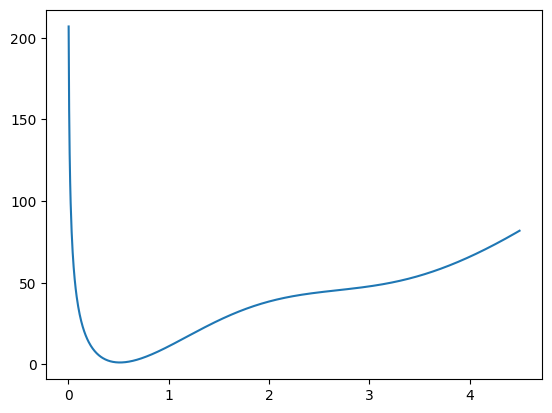

In [27]:
plt.plot(x_data, y_data)

In [28]:

def main_func(x, a, b, c):
    return (a * anp.sin(x) + b * anp.log(x))**2 + c*x**2

def mse_loss(weights):
    predicted = main_func(x_data, *weights)
    return anp.mean((y_data - predicted)**2)

mse: 11.163901549226754


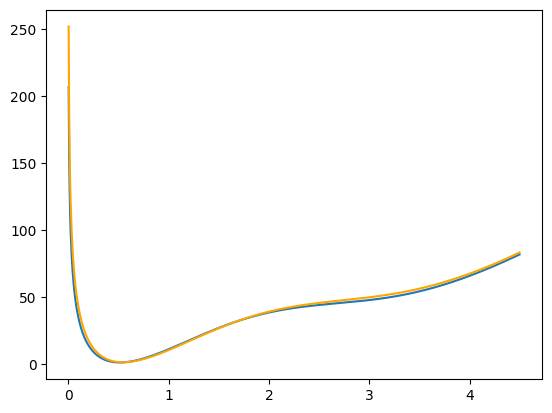

In [29]:
weights = anp.array([3., 3., 4.])
y_pred = main_func(x_data, *weights)
plt.plot(x_data, y_data)
plt.plot(x_data, y_pred, c='orange')
print(f'mse: {mse_loss(weights)}')

In [30]:
loss_grad = grad(mse_loss)

def optimize(weights, alpha, n):
    for i in range(n):
        weights -= alpha * loss_grad(weights)
    print(f'mse is {mse_loss(weights)} with weights: {weights}')
    return weights

optimize(weights, 0.001, 1000);

mse is 8.257856173405966e-28 with weights: [3.14162 2.71837 3.99997]


mse: 8.257856173405966e-28


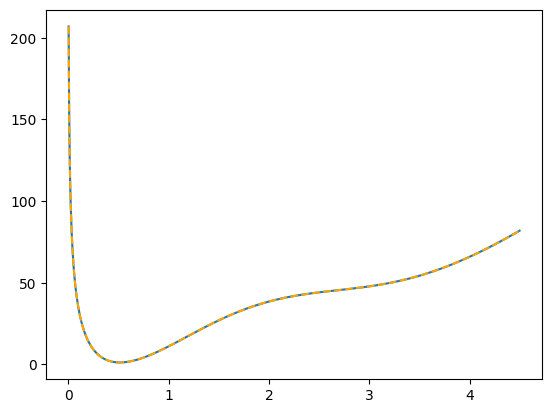

In [31]:
y_pred = main_func(x_data, *weights)
plt.plot(x_data, y_data)
plt.plot(x_data, y_pred, c='orange', linestyle='--')
print(f'mse: {mse_loss(weights)}')

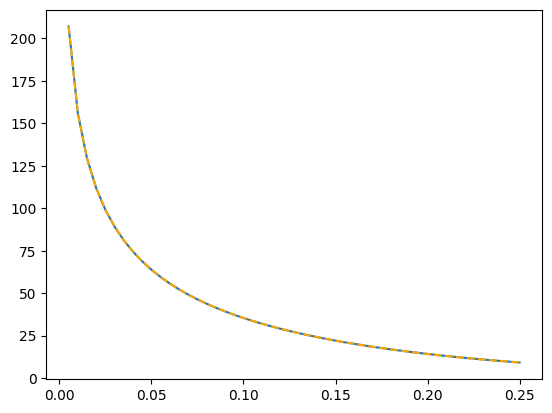

In [32]:
n = 50
plt.plot(x_data[:n], y_data[:n])
plt.plot(x_data[:n], y_pred[:n], c='orange', linestyle='--')